In [2]:
#https://www.tensorflow.org/tutorials/images/data_augmentation?hl=ko
import matplotlib.pyplot as pit
import numpy as np
import tensorflow as tf

In [10]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
print(x_train.shape)
print(y_train.shape)
pit.imshow(x_train[0], cmap='gray', vmin=0, vmax=1)

x_train = x_train[..., tf.newaxis].astype('float32')
x_test = x_test[..., tf.newaxis].astype('float32')
# 1. NHW 데이터를 NHWC 데이터로 변경 2. float32 data type으로 변경...
# N Number of samples. H Height. W width. C channel
# NCHW로 사용 가능하지만, NHWC가 주요 모양.
print(x_train.shape)
print(x_test.shape)
print(tf.math.reduce_max(x_train))
print(tf.math.reduce_min(x_train))
print(tf.math.reduce_std(x_train))

(60000, 28, 28)
(60000,)
(60000, 28, 28, 1)
(10000, 28, 28, 1)
tf.Tensor(1.0, shape=(), dtype=float32)
tf.Tensor(0.0, shape=(), dtype=float32)
tf.Tensor(0.30810735, shape=(), dtype=float32)


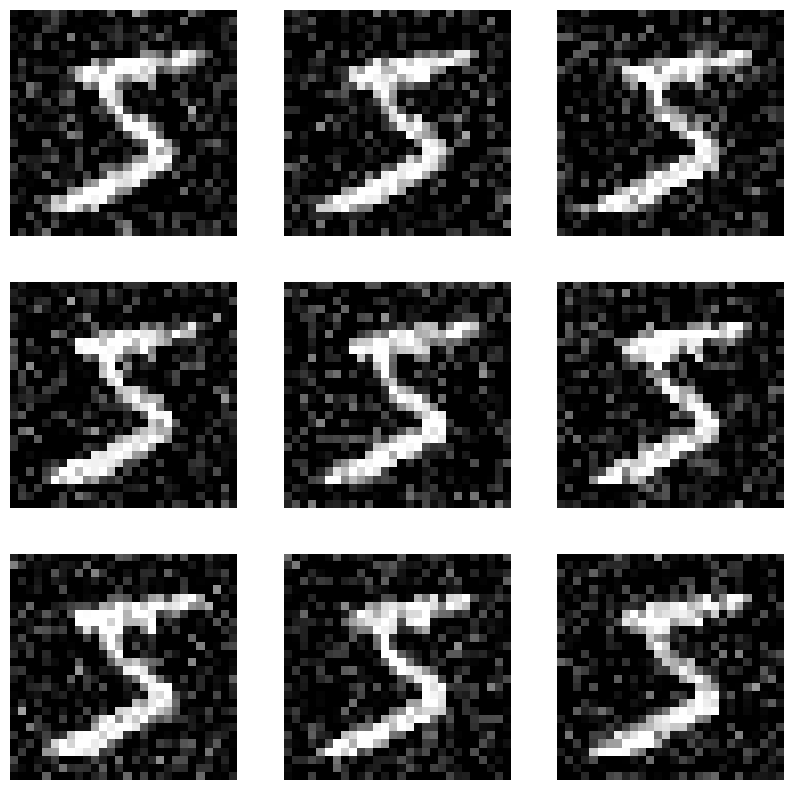

In [19]:
data_augumentation = tf.keras.Sequential([
    # tf.keras.layers.RandomRotation(0.05),
    tf.keras.layers.GaussianNoise(0.2), #std=?인 gaussian noise 추가 평균=0 default
])

#GaussianNoise는 training 할때만 작동함.
aug_img = data_augumentation(x_train[0], training = True)

pit.figure(figsize=(10,10))
for i in range(9):
    aug_img = data_augumentation(x_train[0], training = True)
    aug_img = tf.reshape(aug_img, shape = (28, -1)) # 1x28x28x1 => 28x28
    ax = pit.subplot(3,3, i+1) # 3x3 display 중에 i+1 block
    pit.imshow(aug_img, cmap='gray', vmin=0, vmax=1)
    pit.axis('off')

In [34]:
model = tf.keras.models.Sequential([
   
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128, activation='relu'), 
     data_augumentation, #학습 하면서 random data augmentation
    tf.keras.layers.Dense(units=128, activation='relu'), 
    tf.keras.layers.Dense(10)
])
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
model.compile(optimizer='SGD', loss=loss_fn, metrics=['accuracy'])
model.fit(x_train[0:32], y_train[0:32], batch_size=4, epochs=512)
model.evaluate(x_test, y_test, verbose=2)

Train on 32 samples
Epoch 1/512
32/32 [==============================] - 0s 9ms/sample - loss: 2.4659 - accuracy: 0.1250
Epoch 2/512
32/32 [==============================] - 0s 1ms/sample - loss: 2.3277 - accuracy: 0.1562
Epoch 3/512
32/32 [==============================] - 0s 947us/sample - loss: 2.2145 - accuracy: 0.1875
Epoch 4/512
32/32 [==============================] - 0s 1ms/sample - loss: 2.1136 - accuracy: 0.2188
Epoch 5/512
32/32 [==============================] - 0s 910us/sample - loss: 2.0496 - accuracy: 0.2188
Epoch 6/512
32/32 [==============================] - 0s 1ms/sample - loss: 1.9358 - accuracy: 0.2500
Epoch 7/512
32/32 [==============================] - 0s 1ms/sample - loss: 1.9085 - accuracy: 0.4062
Epoch 8/512
32/32 [==============================] - 0s 842us/sample - loss: 1.7926 - accuracy: 0.5625
Epoch 9/512
32/32 [==============================] - 0s 1ms/sample - loss: 1.7560 - accuracy: 0.5625
Epoch 10/512
32/32 [==============================] - 0s 1ms/samp

32/32 [==============================] - 0s 1ms/sample - loss: 0.0432 - accuracy: 1.0000
Epoch 81/512
32/32 [==============================] - 0s 1ms/sample - loss: 0.0420 - accuracy: 1.0000
Epoch 82/512
32/32 [==============================] - 0s 1ms/sample - loss: 0.0421 - accuracy: 1.0000
Epoch 83/512
32/32 [==============================] - 0s 1ms/sample - loss: 0.0397 - accuracy: 1.0000
Epoch 84/512
32/32 [==============================] - 0s 1ms/sample - loss: 0.0379 - accuracy: 1.0000
Epoch 85/512
32/32 [==============================] - 0s 1ms/sample - loss: 0.0342 - accuracy: 1.0000
Epoch 86/512
32/32 [==============================] - 0s 1ms/sample - loss: 0.0398 - accuracy: 1.0000
Epoch 87/512
32/32 [==============================] - 0s 920us/sample - loss: 0.0375 - accuracy: 1.0000
Epoch 88/512
32/32 [==============================] - 0s 886us/sample - loss: 0.0373 - accuracy: 1.0000
Epoch 89/512
32/32 [==============================] - 0s 879us/sample - loss: 0.0359 - accu

32/32 [==============================] - 0s 1ms/sample - loss: 0.0132 - accuracy: 1.0000
Epoch 160/512
32/32 [==============================] - 0s 1ms/sample - loss: 0.0122 - accuracy: 1.0000
Epoch 161/512
32/32 [==============================] - 0s 1ms/sample - loss: 0.0122 - accuracy: 1.0000
Epoch 162/512
32/32 [==============================] - 0s 991us/sample - loss: 0.0116 - accuracy: 1.0000
Epoch 163/512
32/32 [==============================] - 0s 1ms/sample - loss: 0.0113 - accuracy: 1.0000
Epoch 164/512
32/32 [==============================] - 0s 1ms/sample - loss: 0.0100 - accuracy: 1.0000
Epoch 165/512
32/32 [==============================] - 0s 1ms/sample - loss: 0.0133 - accuracy: 1.0000
Epoch 166/512
32/32 [==============================] - 0s 1ms/sample - loss: 0.0137 - accuracy: 1.0000
Epoch 167/512
32/32 [==============================] - 0s 1ms/sample - loss: 0.0133 - accuracy: 1.0000
Epoch 168/512
32/32 [==============================] - 0s 1ms/sample - loss: 0.0116 -

32/32 [==============================] - 0s 1ms/sample - loss: 0.0073 - accuracy: 1.0000
Epoch 239/512
32/32 [==============================] - 0s 1ms/sample - loss: 0.0085 - accuracy: 1.0000
Epoch 240/512
32/32 [==============================] - 0s 1ms/sample - loss: 0.0061 - accuracy: 1.0000
Epoch 241/512
32/32 [==============================] - 0s 1ms/sample - loss: 0.0075 - accuracy: 1.0000
Epoch 242/512
32/32 [==============================] - 0s 1ms/sample - loss: 0.0073 - accuracy: 1.0000
Epoch 243/512
32/32 [==============================] - 0s 886us/sample - loss: 0.0063 - accuracy: 1.0000
Epoch 244/512
32/32 [==============================] - 0s 803us/sample - loss: 0.0075 - accuracy: 1.0000
Epoch 245/512
32/32 [==============================] - 0s 695us/sample - loss: 0.0074 - accuracy: 1.0000
Epoch 246/512
32/32 [==============================] - 0s 621us/sample - loss: 0.0066 - accuracy: 1.0000
Epoch 247/512
32/32 [==============================] - 0s 704us/sample - loss: 

32/32 [==============================] - 0s 441us/sample - loss: 0.0053 - accuracy: 1.0000
Epoch 317/512
32/32 [==============================] - 0s 486us/sample - loss: 0.0053 - accuracy: 1.0000
Epoch 318/512
32/32 [==============================] - 0s 457us/sample - loss: 0.0041 - accuracy: 1.0000
Epoch 319/512
32/32 [==============================] - 0s 502us/sample - loss: 0.0049 - accuracy: 1.0000
Epoch 320/512
32/32 [==============================] - 0s 511us/sample - loss: 0.0050 - accuracy: 1.0000
Epoch 321/512
32/32 [==============================] - 0s 539us/sample - loss: 0.0055 - accuracy: 1.0000
Epoch 322/512
32/32 [==============================] - 0s 514us/sample - loss: 0.0045 - accuracy: 1.0000
Epoch 323/512
32/32 [==============================] - 0s 500us/sample - loss: 0.0049 - accuracy: 1.0000
Epoch 324/512
32/32 [==============================] - 0s 500us/sample - loss: 0.0045 - accuracy: 1.0000
Epoch 325/512
32/32 [==============================] - 0s 492us/sampl

32/32 [==============================] - 0s 917us/sample - loss: 0.0033 - accuracy: 1.0000
Epoch 395/512
32/32 [==============================] - 0s 1ms/sample - loss: 0.0042 - accuracy: 1.0000
Epoch 396/512
32/32 [==============================] - 0s 1ms/sample - loss: 0.0034 - accuracy: 1.0000
Epoch 397/512
32/32 [==============================] - 0s 1ms/sample - loss: 0.0036 - accuracy: 1.0000
Epoch 398/512
32/32 [==============================] - 0s 1ms/sample - loss: 0.0030 - accuracy: 1.0000
Epoch 399/512
32/32 [==============================] - 0s 1ms/sample - loss: 0.0027 - accuracy: 1.0000
Epoch 400/512
32/32 [==============================] - 0s 972us/sample - loss: 0.0026 - accuracy: 1.0000
Epoch 401/512
32/32 [==============================] - 0s 1ms/sample - loss: 0.0035 - accuracy: 1.0000
Epoch 402/512
32/32 [==============================] - 0s 985us/sample - loss: 0.0035 - accuracy: 1.0000
Epoch 403/512
32/32 [==============================] - 0s 1ms/sample - loss: 0.00

32/32 [==============================] - 0s 1ms/sample - loss: 0.0029 - accuracy: 1.0000
Epoch 473/512
32/32 [==============================] - 0s 970us/sample - loss: 0.0029 - accuracy: 1.0000
Epoch 474/512
32/32 [==============================] - 0s 1ms/sample - loss: 0.0026 - accuracy: 1.0000
Epoch 475/512
32/32 [==============================] - 0s 866us/sample - loss: 0.0028 - accuracy: 1.0000
Epoch 476/512
32/32 [==============================] - 0s 829us/sample - loss: 0.0036 - accuracy: 1.0000
Epoch 477/512
32/32 [==============================] - 0s 680us/sample - loss: 0.0024 - accuracy: 1.0000
Epoch 478/512
32/32 [==============================] - 0s 711us/sample - loss: 0.0026 - accuracy: 1.0000
Epoch 479/512
32/32 [==============================] - 0s 607us/sample - loss: 0.0026 - accuracy: 1.0000
Epoch 480/512
32/32 [==============================] - 0s 598us/sample - loss: 0.0027 - accuracy: 1.0000
Epoch 481/512
32/32 [==============================] - 0s 554us/sample - 

[1.7233221655845643, 0.5548]

In [35]:
#[1.582899118232727, 0.5407] data augmentation 없는 결과...
#[1.7467470359802246, 0.5377] guassian noise data augmentatin 결과
model.summary()
model.evaluate(x_test, y_test, verbose=2)
test_model = tf.keras.Sequential() # model의 있는 ?:?까지
for layer in model.layers[1:]:
    # layer가 0,1,2,3,4 중 1,2,3,4만 add
    test_model.add(layer)
    
test_model.compile(optimizer='SGD', loss=loss_fn, metrics=['accuracy'])
test_model.evaluate(x_test, y_test, verbose=2)
test_model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          multiple                  0         
_________________________________________________________________
dense_15 (Dense)             multiple                  100480    
_________________________________________________________________
sequential_5 (Sequential)    multiple                  0         
_________________________________________________________________
dense_16 (Dense)             multiple                  16512     
_________________________________________________________________
dense_17 (Dense)             multiple                  1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________
10000/1 - 1s - loss: 1.3171 - accuracy: 0.5548


ValueError: Input 0 of layer sequential_16 is incompatible with the layer: expected axis -1 of input shape to have value 784 but received input with shape [None, 28, 28, 1]